# Predicting House Prices

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import src.helper as hlp

In [3]:
# Constants
idx_col = 'Id'
target_col = 'SalePrice'

## EDA

### Load Train Data

In [4]:
train_df = pd.read_csv('data/train.csv')

In [5]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Data Field Descriptions
```
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
```

### Get Null Counts

In [7]:
hlp.print_null_ct(train_df)

Count of Null Values per Column, if any:

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


### Get Unique Counts

In [8]:
hlp.print_unique_ct(train_df)

Count of Unique Values per Column:

Id: 1460
MSSubClass: 15
MSZoning: 5
LotFrontage: 111
LotArea: 1073
Street: 2
Alley: 3
LotShape: 4
LandContour: 4
Utilities: 2
LotConfig: 5
LandSlope: 3
Neighborhood: 25
Condition1: 9
Condition2: 8
BldgType: 5
HouseStyle: 8
OverallQual: 10
OverallCond: 9
YearBuilt: 112
YearRemodAdd: 61
RoofStyle: 6
RoofMatl: 8
Exterior1st: 15
Exterior2nd: 16
MasVnrType: 5
MasVnrArea: 328
ExterQual: 4
ExterCond: 5
Foundation: 6
BsmtQual: 5
BsmtCond: 5
BsmtExposure: 5
BsmtFinType1: 7
BsmtFinSF1: 637
BsmtFinType2: 7
BsmtFinSF2: 144
BsmtUnfSF: 780
TotalBsmtSF: 721
Heating: 6
HeatingQC: 5
CentralAir: 2
Electrical: 6
1stFlrSF: 753
2ndFlrSF: 417
LowQualFinSF: 24
GrLivArea: 861
BsmtFullBath: 4
BsmtHalfBath: 3
FullBath: 4
HalfBath: 3
BedroomAbvGr: 8
KitchenAbvGr: 4
KitchenQual: 4
TotRmsAbvGrd: 12
Functional: 7
Fireplaces: 4
FireplaceQu: 6
GarageType: 7
GarageYrBlt: 98
GarageFinish: 4
GarageCars: 5
GarageArea: 441
GarageQual: 6
GarageCond: 6
PavedDrive: 3
WoodDeckSF: 274
OpenPo

### Get Object Columns

In [9]:
obj_cols = hlp.get_cols_of_type(train_df, 'object')

object Columns (43): 
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [10]:
train_df[obj_cols].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### Get Number Columns

In [11]:
num_cols = hlp.get_cols_of_type(train_df, 'number')

number Columns (38): 
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [12]:
train_df[num_cols].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [13]:
# sns.pairplot(train_df[num_cols].sample(700))

## Data Pre-Processing

### Load Test Data

In [14]:
test_df = pd.read_csv('data/test.csv')
test_idx = test_df[idx_col]
X_test = test_df.to_numpy()

### One-Hot Encode Obj Cols, Impute Means for Number Cols

In [15]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
hlp.print_null_ct(train_df)

Count of Null Values per Column, if any:

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [17]:
# Impute & clean with pipeline
train_df_encoded_cleaned, test_df_encoded_cleaned = hlp.pipeline(train_df, test_df)
train_df_encoded_cleaned.head()

object Columns (43): 
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_is_ConLw,SaleType_is_New,SaleType_is_Oth,SaleType_is_WD,SaleCondition_is_Abnorml,SaleCondition_is_AdjLand,SaleCondition_is_Alloca,SaleCondition_is_Family,SaleCondition_is_Normal,SaleCondition_is_Partial
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# Re-Check Nulls
hlp.print_null_ct(train_df_encoded_cleaned)
# hlp.print_null_ct(test_df_encoded_cleaned)

Count of Null Values per Column, if any:

Series([], dtype: int64)


In [19]:
train_df_encoded_cleaned.shape, test_df_encoded_cleaned.shape

((1460, 305), (1459, 304))

### Do Something with Number Columns...

## Modeling

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score

### Before Data Wrangling

### 1. Baseline Model - Linear Regression with few features, original train data

In [21]:
#### Split y from Train Data
y_train = hlp.split_y_from_df(target_col, train_df)
y_train.shape

(1460,)

In [22]:
# Baseline Features: year and month of sale, lot square footage, and number of bedrooms
baseline_cols = ['MoSold', 'YrSold', 'LotArea', 'BedroomAbvGr']
X_train_baseline = train_df[baseline_cols].to_numpy()
X_test_baseline = test_df[baseline_cols].to_numpy()
# Fit default Linear Regression
lr_baseline = LinearRegression()

hlp.fit_pred_score_Nfold(lr_baseline, X_train_baseline, y_train, X_test_baseline, test_idx, target_col, model_name='Baseline Linear Regression', csv='lr_baseline')

Baseline Linear Regression RMSE, 10-fold CV on Train Data: 76491.812


### 2. After Data Wrangling - *ALL Features*

### Decision Tree Models

### A. Default Decision Tree

In [23]:
#### Split X/y from one-hot encoded, cleaned data
X_train_full, y_train_full = hlp.split_Xy_from_df(target_col, train_df_encoded_cleaned)
X_test_full = test_df_encoded_cleaned.to_numpy()

In [24]:
# Fit default Decision Tree
dt_default = DecisionTreeRegressor()

hlp.fit_pred_score_Nfold(dt_default, X_train_full, y_train_full, X_test_full, test_idx, target_col, model_name='Default Decision Tree, All Features', csv='dt_default_af')

Default Decision Tree, All Features RMSE, 10-fold CV on Train Data: 39481.577


### Ensemble Models

### B. Default Random Forest

In [25]:
# Fit default Random Forest
rf_default = RandomForestRegressor(n_estimators=100)

In [26]:
hlp.fit_pred_score_Nfold(rf_default, X_train_full, y_train_full, X_test_full, test_idx, target_col, model_name='Default Random Forest, All Features', csv='rf_default_af')

Default Random Forest, All Features RMSE, 10-fold CV on Train Data: 28756.093


In [27]:
feature_list = list(train_df_encoded_cleaned.drop(columns=[target_col]).columns)

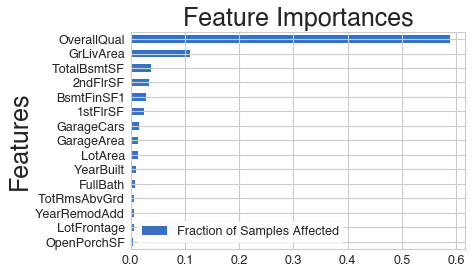

In [28]:
feature_list = train_df_encoded_cleaned.drop(columns=[target_col]).columns
plt, rev_sort_feature_cols = hlp.plot_topN_features(rf_default.feature_importances_, feature_list, 15)

In [29]:
rf_top15 = list(rev_sort_feature_cols[:15])
rf_top15

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 '2ndFlrSF',
 'BsmtFinSF1',
 '1stFlrSF',
 'GarageCars',
 'GarageArea',
 'LotArea',
 'YearBuilt',
 'FullBath',
 'TotRmsAbvGrd',
 'YearRemodAdd',
 'LotFrontage',
 'OpenPorchSF']

### C. Default Gradient Boosting Regressor

In [30]:
# Fit default Gradient Boosting Regressor
gb_default = GradientBoostingRegressor()

In [31]:
hlp.fit_pred_score_Nfold(gb_default, X_train_full, y_train_full, X_test_full, test_idx, target_col, model_name='Default Gradient Boost, All Features', csv='gb_default_af')

Default Gradient Boost, All Features RMSE, 10-fold CV on Train Data: 25837.084


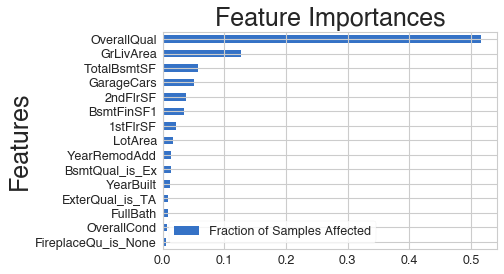

In [32]:
plt, rev_sort_feature_cols = hlp.plot_topN_features(gb_default.feature_importances_, feature_list, 15)

In [33]:
gb_top15 = list(rev_sort_feature_cols[:15])
gb_top15

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 'GarageCars',
 '2ndFlrSF',
 'BsmtFinSF1',
 '1stFlrSF',
 'LotArea',
 'YearRemodAdd',
 'BsmtQual_is_Ex',
 'YearBuilt',
 'ExterQual_is_TA',
 'FullBath',
 'OverallCond',
 'FireplaceQu_is_None']

### More Linear Regression Models

### D. Default Linear Regression

In [34]:
hlp.fit_pred_score_Nfold(lr_baseline, X_train_full, y_train_full, X_test_full, test_idx, target_col, model_name='Default Linear Regression, All Features', csv='lr_default_af')

Default Linear Regression, All Features RMSE, 10-fold CV on Train Data: 42027.865


### 3. After Data Wrangling - *Limited Features*

### A. Trying "Most Important" features from default rf, gb

In [35]:
most_important_feats = list(set(rf_top15 + gb_top15))
most_important_feats

['LotArea',
 'OverallQual',
 'YearBuilt',
 'FullBath',
 'TotalBsmtSF',
 'FireplaceQu_is_None',
 'GarageArea',
 'BsmtQual_is_Ex',
 'GrLivArea',
 'ExterQual_is_TA',
 'LotFrontage',
 'GarageCars',
 '1stFlrSF',
 '2ndFlrSF',
 'TotRmsAbvGrd',
 'YearRemodAdd',
 'BsmtFinSF1',
 'OpenPorchSF',
 'OverallCond']

In [36]:
train_df_encoded_cleaned[most_important_feats].head()

,LotArea,OverallQual,YearBuilt,FullBath,TotalBsmtSF,FireplaceQu_is_None,GarageArea,BsmtQual_is_Ex,GrLivArea,ExterQual_is_TA,LotFrontage,GarageCars,1stFlrSF,2ndFlrSF,TotRmsAbvGrd,YearRemodAdd,BsmtFinSF1,OpenPorchSF,OverallCond
0,8450.0,7.0,2003.0,2.0,856.0,1.0,548.0,0.0,1710.0,0.0,65.0,2.0,856.0,854.0,8.0,2003.0,706.0,61.0,5.0
1,9600.0,6.0,1976.0,2.0,1262.0,0.0,460.0,0.0,1262.0,1.0,80.0,2.0,1262.0,0.0,6.0,1976.0,978.0,0.0,8.0
2,11250.0,7.0,2001.0,2.0,920.0,0.0,608.0,0.0,1786.0,0.0,68.0,2.0,920.0,866.0,6.0,2002.0,486.0,42.0,5.0
3,9550.0,7.0,1915.0,1.0,756.0,0.0,642.0,0.0,1717.0,1.0,60.0,3.0,961.0,756.0,7.0,1970.0,216.0,35.0,5.0
4,14260.0,8.0,2000.0,2.0,1145.0,0.0,836.0,0.0,2198.0,0.0,84.0,3.0,1145.0,1053.0,9.0,2000.0,655.0,84.0,5.0


In [37]:
#### Get only most important features for X Train
X_train_mif = train_df_encoded_cleaned[most_important_feats].to_numpy()
X_test_mif = test_df_encoded_cleaned[most_important_feats].to_numpy()

In [44]:
models = [lr_baseline, dt_default, rf_default, gb_default]
for model in models:
    hlp.fit_pred_score_Nfold(model, X_train_mif, y_train_full, X_test_mif, test_idx, target_col)

LinearRegression RMSE, 10-fold CV on Train Data: 34006.254
DecisionTreeRegressor RMSE, 10-fold CV on Train Data: 37270.061
RandomForestRegressor RMSE, 10-fold CV on Train Data: 28394.869
GradientBoostingRegressor RMSE, 10-fold CV on Train Data: 25763.877


### 4. Hyperparameter Tuning with GridSearchCV

In [ ]:
random_forest_grid = {'max_depth': [3, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [2, 4],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [10, 20, 40, 80],
                      'random_state': [1]}

rf_gridsearch = GridSearchCV(RandomForestRegressor(),
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='mean_squared_error')
rf_gridsearch.fit(X_train, y_train)

print "best parameters:", rf_gridsearch.best_params_

best_rf_model = rf_gridsearch.best_estimator_

# Appendix

#### Developing One-Hot Encoding Method for All Obj Cols

In [39]:
train_df_encoded = train_df.copy()
train_df_encoded.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [40]:
col = obj_cols[0]
col
train_df_obj = train_df[col].fillna('None')
train_df_obj.value_counts()

'MSZoning'

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [41]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

col_name = col + '_is_'

# Get object column, fill NaNs with 'None'
train_df_obj = train_df[col].fillna('None')
train_obj_arr = train_df_obj.to_numpy().reshape(-1,1)

# Create one-hot encoder
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
ohe.fit(train_obj_arr)    # Assume for simplicity all features are categorical.

# Apply the one-hot encoder
train_obj_encoded = ohe.transform(train_obj_arr)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=False)

In [42]:
cols = [col_name + cat for cat in ohe.categories_[0]]
train_obj_encoded_df = pd.DataFrame(train_obj_encoded, columns=cols)
train_obj_encoded_df.sample(5)
train_obj_encoded_df.columns

,MSZoning_is_C (all),MSZoning_is_FV,MSZoning_is_RH,MSZoning_is_RL,MSZoning_is_RM
232,0.0,0.0,0.0,0.0,1.0
620,0.0,0.0,0.0,1.0,0.0
845,0.0,0.0,0.0,1.0,0.0
310,0.0,0.0,0.0,1.0,0.0
903,0.0,0.0,0.0,1.0,0.0


Index(['MSZoning_is_C (all)', 'MSZoning_is_FV', 'MSZoning_is_RH',
       'MSZoning_is_RL', 'MSZoning_is_RM'],
      dtype='object')

In [43]:
train_df_encoded = train_df_encoded.merge(train_obj_encoded_df, how='left', on=train_df_encoded.index)
train_df_encoded.drop(columns=[col, 'key_0'], inplace=True)
train_df_encoded.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_is_C (all),MSZoning_is_FV,MSZoning_is_RH,MSZoning_is_RL,MSZoning_is_RM
0,1,60,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2,2008,WD,Normal,208500,0.0,0.0,0.0,1.0,0.0
1,2,20,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,5,2007,WD,Normal,181500,0.0,0.0,0.0,1.0,0.0
2,3,60,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,9,2008,WD,Normal,223500,0.0,0.0,0.0,1.0,0.0
3,4,70,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,2,2006,WD,Abnorml,140000,0.0,0.0,0.0,1.0,0.0
4,5,60,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,12,2008,WD,Normal,250000,0.0,0.0,0.0,1.0,0.0
